In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
df= pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [5]:
df1= df.iloc[:,1:]
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
#Converting data into numpy array
df_arr= df1.values
df_arr

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
# Normalising the numeric data
df_norm = scale(df_arr)
df_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
#Principal Component Analysis (PCA)
pca_class_instance = PCA()
pca = pca_class_instance.fit_transform(df_norm)

In [9]:
pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [10]:
pca_cls_ins = PCA(n_components=4)
pca = pca_cls_ins.fit_transform(df_norm)
pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00,
         5.62703612e-02],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01,
         3.49381568e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01,
         2.68417600e-02],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00,
      

In [11]:
#The amount of variance each PCA explaines
var = pca_cls_ins.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

In [12]:
# Cumulative variance
var1 = np.cumsum(np.round(var, decimals=4)*100)
var1

array([36.2 , 55.41, 66.53, 73.6 ])

In [13]:
pca_cls_ins.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086]])

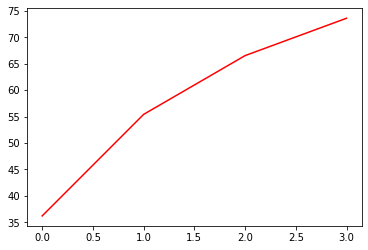

In [14]:
#Variance plot for PCA componenets obtained
plt.plot(var1, color ='red')

In [15]:
pca[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

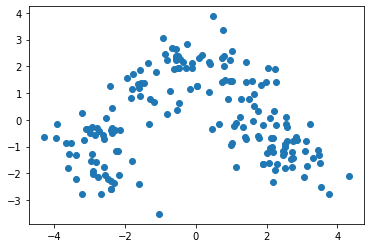

In [16]:
# plot between PCA1 and PCA2
x= pca[:,0:1]
y= pca[:,1:2]
plt. scatter(x,y);

In [17]:
final_df = pd.concat([df['Type'],pd.DataFrame(pca[:,0:3], columns=['PC1','PC2','PC3'])],axis=1)
final_df.head(10)

,Type,PC1,PC2,PC3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688
5,1,3.050254,-2.122401,-0.629396
6,1,2.449090,-1.174850,-0.977095
7,1,2.059437,-1.608963,0.146282
8,1,2.510874,-0.918071,-1.770969
9,1,2.753628,-0.789438,-0.984247


<AxesSubplot:>

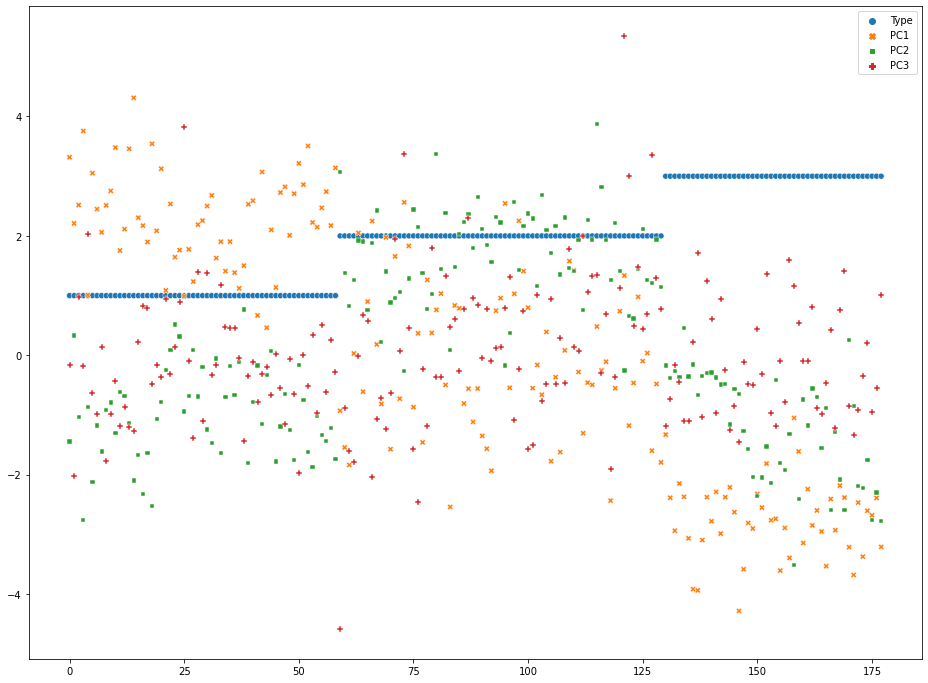

In [18]:
#visualisation of PCA's 
fig= plt.figure(figsize=(16,12))
sns.scatterplot(data=final_df)

# Hierarchical Clustering

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import  AgglomerativeClustering

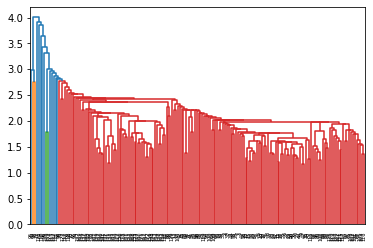

In [20]:
#creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [21]:
#creating clusters
h_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')

In [22]:
#Adding cluster to df
cluster_fit = h_cluster.fit_predict(df_norm)
cluster = pd.DataFrame(cluster_fit,columns=['Cluster_id'])
cluster

,Cluster_id
0,0
1,0
2,0
3,0
4,0
...,...
173,0
174,0
175,0
176,0


In [23]:
df['Cluster_id']=cluster
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


# k-mean Clustering

In [24]:
#Importing Libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler

In [25]:
#The kmeans algorithm aims to choose centroid the minimises the inertia, or within-cluster sum-of-squre criterion
wcss=[]
for i in range(1,7):
    kmeans= KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
wcss

[2314.0000000000005,
 1659.0079672511501,
 1277.928488844642,
 1175.705192819712,
 1104.8616839625317,
 1042.3872037251417]

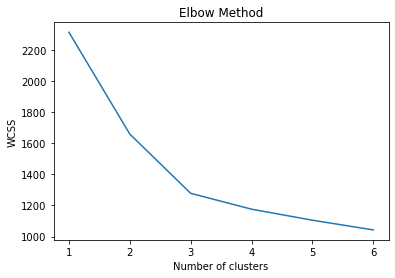

In [27]:
#Plotting wcss
plt.plot(range(1,7),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
#Building Cluster  Algorithm
k_cluster = KMeans(3,random_state=42)
k_cluster.fit(df_norm)

KMeans(n_clusters=3, random_state=42)

In [29]:
#Assigning cluster to dataset
df['Cluster_id']= k_cluster.labels_
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [30]:
df.groupby('Type').agg([])

Empty DataFrame
Columns: []
Index: []